In [1]:
!pip install mlflow

In [2]:
import mlflow

In [3]:
print(mlflow.__version__)

2.19.0


In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [5]:
train_df = pd.read_csv(r"C:\Users\Keerti Joshi\Documents\Jupyter notebooks\data.csv")
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP002529,Male,Yes,2,Graduate,No,6700,1750.0,230.0,300.0,1.0,Semiurban,Y
1,LP001385,Male,No,0,Graduate,No,5316,0.0,136.0,360.0,1.0,Urban,Y
2,LP001926,Male,Yes,0,Graduate,No,3704,2000.0,120.0,360.0,1.0,Rural,Y
3,LP001144,Male,Yes,0,Graduate,No,5821,0.0,144.0,360.0,1.0,Urban,Y
4,LP002562,Male,Yes,1,Not Graduate,No,5333,1131.0,186.0,360.0,NaN,Urban,Y


In [6]:
train_df.shape

(430, 13)

In [7]:
train_df['Gender']= train_df['Gender'].map({'Male':0, 'Female':1})
train_df['Married']= train_df['Married'].map({'No':0, 'Yes':1})
train_df['Loan_Status']= train_df['Loan_Status'].map({'N':0, 'Y':1})

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430 entries, 0 to 429
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            430 non-null    object 
 1   Gender             420 non-null    float64
 2   Married            427 non-null    float64
 3   Dependents         416 non-null    object 
 4   Education          430 non-null    object 
 5   Self_Employed      410 non-null    object 
 6   ApplicantIncome    430 non-null    int64  
 7   CoapplicantIncome  430 non-null    float64
 8   LoanAmount         414 non-null    float64
 9   Loan_Amount_Term   422 non-null    float64
 10  Credit_History     394 non-null    float64
 11  Property_Area      430 non-null    object 
 12  Loan_Status        430 non-null    int64  
dtypes: float64(6), int64(2), object(5)
memory usage: 43.8+ KB


In [8]:
train_df.isnull().sum()

Loan_ID               0
Gender               10
Married               3
Dependents           14
Education             0
Self_Employed        20
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           16
Loan_Amount_Term      8
Credit_History       36
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
train_df = train_df.dropna()
train_df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [10]:
train_df.shape

(335, 13)

In [11]:
X = train_df[['Gender', 'Married', 'ApplicantIncome', 'LoanAmount', 'Credit_History']]
y = train_df.Loan_Status
X.shape, y.shape

((335, 5), (335,))

In [12]:
X.head()

,Gender,Married,ApplicantIncome,LoanAmount,Credit_History
0,0.0,1.0,6700,230.0,1.0
1,0.0,0.0,5316,136.0,1.0
2,0.0,1.0,3704,120.0,1.0
3,0.0,1.0,5821,144.0,1.0
5,0.0,1.0,3052,100.0,1.0


In [13]:
y.head()

0    1
1    1
2    1
3    1
5    1
Name: Loan_Status, dtype: int64

In [14]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=5)

In [15]:
model = RandomForestClassifier(max_depth=4, random_state=5)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, random_state=5)

In [16]:
pred_val = model.predict(X_val)
accuracy_score(y_val, pred_val)

0.7524752475247525

In [17]:
pred_train = model.predict(X_train)
accuracy_score(y_train, pred_train)

0.8247863247863247

In [18]:
#Create new experiment in mlflow:

mlflow.set_experiment('Loan_Application')

2025/01/14 21:33:06 INFO mlflow.tracking.fluent: Experiment with name 'Loan_Application' does not exist. Creating a new experiment.


<Experiment: artifact_location='file:///C:/Users/Keerti%20Joshi/Documents/Jupyter%20notebooks/mlruns/676307245769287090', creation_time=1736870586389, experiment_id='676307245769287090', last_update_time=1736870586389, lifecycle_stage='active', name='Loan_Application', tags={}>

In [19]:
with mlflow.start_run():
    model_rf = RandomForestClassifier(max_depth=4, random_state=5)
    model_rf.fit(X_train, y_train)

    pred_val = model_rf.predict(X_val)
    val_acc = accuracy_score(y_val, pred_val)

    pred_train = model_rf.predict(X_train)
    train_acc = accuracy_score(y_train, pred_train)

    # Set a tag that we can use to remind ourselves what this run was for
    mlflow.set_tag("mlflow.runName", "first_run")
    
    # Log the hyperparameters
    mlflow.log_param('max_depth', 4)

    # Log the loss metric
    mlflow.log_metric('val_acc', val_acc)
    mlflow.log_metric('train_acc',train_acc)

    mlflow.sklearn.log_model(model_rf, "rf_model")

2025/01/14 21:34:45 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


In [20]:
!mlflow ui

^C


In [21]:
#New Data

train_df = pd.read_csv('data_new.csv')
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [22]:
train_df['Gender']= train_df['Gender'].map({'Male':0, 'Female':1})
train_df['Married']= train_df['Married'].map({'No':0, 'Yes':1})
train_df['Loan_Status']= train_df['Loan_Status'].map({'N':0, 'Y':1})

train_df = train_df.dropna()

In [23]:
X = train_df[['Gender', 'Married', 'ApplicantIncome', 'LoanAmount', 'Credit_History']]
y = train_df.Loan_Status
X.shape, y.shape

((480, 5), (480,))

In [24]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=5)

In [25]:
max_depth = [3,4,5,6,7]
for depth in max_depth:
    with mlflow.start_run():
    
        model_rf = RandomForestClassifier(max_depth=depth, random_state=5)
        model_rf.fit(X_train, y_train) # trained on new data
    
        pred_val = model_rf.predict(X_val)
        val_acc=accuracy_score(y_val, pred_val)
    
        pred_train = model_rf.predict(X_train)
        train_acc=accuracy_score(y_train, pred_train)
    
        mlflow.set_tag('mlflow.runName','new_data')
        
        mlflow.set_tag("Training Info", "data collection")
        
        mlflow.set_tag('data file','data_new.csv')
        
        mlflow.log_param('max_depth',depth)
        mlflow.log_metric('val_acc',val_acc)
        mlflow.log_metric('train_acc',train_acc)
        
        
        mlflow.sklearn.log_model(model_rf, "rf_model_2")

2025/01/14 21:42:48 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/01/14 21:42:55 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/01/14 21:43:00 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/01/14 21:43:06 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/01/14 21:43:13 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


In [26]:
!mlflow ui

^C


In [27]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

2025/01/14 21:46:18 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


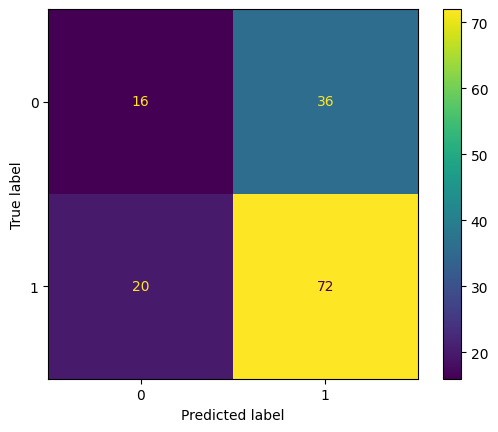

In [31]:
with mlflow.start_run():
    knn_model= KNeighborsClassifier(n_neighbors=3)
    knn_model.fit(X_train, y_train)

    pred_val = knn_model.predict(X_val)
    val_acc=accuracy_score(y_val, pred_val)

    pred_train = knn_model.predict(X_train)
    train_acc=accuracy_score(y_train, pred_train)


    mlflow.set_tag('mlflow.runName',"kNN")
    mlflow.log_param('neighbors',3)
    mlflow.log_metric('val_acc',val_acc)
    mlflow.log_metric('train_acc',train_acc)
    mlflow.set_tag('data file','data_new.csv')

    cm=ConfusionMatrixDisplay.from_predictions( y_val,pred_val)
    cm.figure_.savefig('confusion_mat.png')
    mlflow.log_artifact('confusion_mat.png')

    mlflow.sklearn.log_model(knn_model, "knn_model")

In [32]:
!mlflow ui

^C


In [33]:
!mlflow ui --host=localhost:5555

Traceback (most recent call last):
  File "C:\Users\Keerti Joshi\AppData\Local\Programs\Python\Python313\Lib\site-packages\waitress\adjustments.py", line 368, in __init__
    for s in socket.getaddrinfo(
             ~~~~~~~~~~~~~~~~~~^
        host,
        ^^^^^
    ...<4 lines>...
        socket.AI_PASSIVE,
        ^^^^^^^^^^^^^^^^^^
    ):
    ^
  File "C:\Users\Keerti Joshi\AppData\Local\Programs\Python\Python313\Lib\socket.py", line 975, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
               ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
socket.gaierror: [Errno 11001] getaddrinfo failed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\Keerti Joshi\AppData\Local\Programs\Python\Python313\Lib\site-packages\waitress\__main__.py", line 3, in <mod

2025/01/14 21:48:55 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/01/14 21:49:00 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/01/14 21:49:05 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


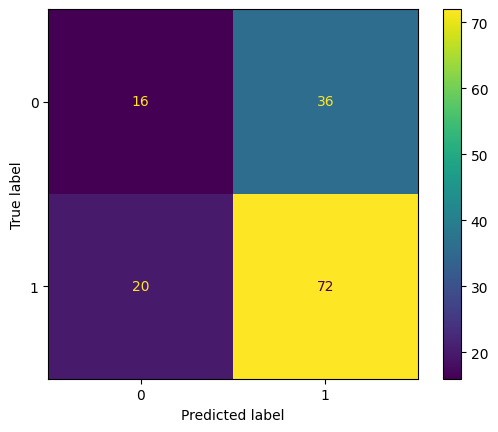

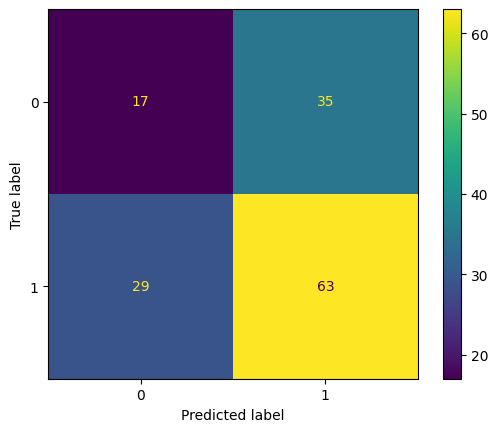

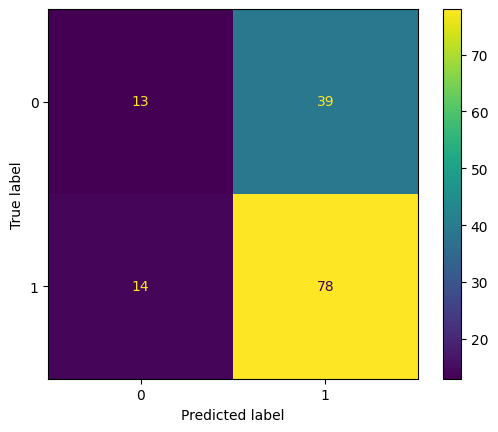

In [34]:
neighbors = [3,4,5]
for n in neighbors:
    with mlflow.start_run():
        knn_model= KNeighborsClassifier(n_neighbors=n)
        knn_model.fit(X_train, y_train)
    
        pred_val = knn_model.predict(X_val)
        val_acc=accuracy_score(y_val, pred_val)
    
        pred_train = knn_model.predict(X_train)
        train_acc=accuracy_score(y_train, pred_train)
    
    
        mlflow.set_tag('mlflow.runName',"kNN")
        mlflow.log_param('neighbors',n)
        mlflow.log_metric('val_acc',val_acc)
        mlflow.log_metric('train_acc',train_acc)
        mlflow.set_tag('data file','data_new.csv')
    
        cm=ConfusionMatrixDisplay.from_predictions( y_val,pred_val)
        cm.figure_.savefig('confusion_mat.png')
        mlflow.log_artifact('confusion_mat.png')
    
        mlflow.sklearn.log_model(knn_model, "knn_model")

In [ ]:
!mlflow ui